In [19]:
import torch
from ptbxlae.modeling.convolutionalVAE import RpeakAE
from ptbxlae.dataprocessing.ptbxlDS import PtbxlSigWithRpeaksDS
import matplotlib.pyplot as plt

In [20]:
torch.no_grad()
m = RpeakAE.load_from_checkpoint('../cache/savedmodels/rpeaks-epoch=032-val_loss=0.016412.ckpt')
m = m.eval()
m

RpeakAE(
  (encoder): ConvolutionalEcgEncoder(
    (net): Sequential(
      (0): Conv1d(12, 24, kernel_size=(7,), stride=(2,), padding=(3,))
      (1): LeakyReLU(negative_slope=0.01)
      (2): Flatten(start_dim=1, end_dim=-1)
      (3): Linear(in_features=60000, out_features=10, bias=True)
    )
  )
  (decoder): Sequential(
    (0): Linear(in_features=10, out_features=2500, bias=True)
    (1): LeakyReLU(negative_slope=0.01)
    (2): Linear(in_features=2500, out_features=5000, bias=True)
    (3): Sigmoid()
  )
)

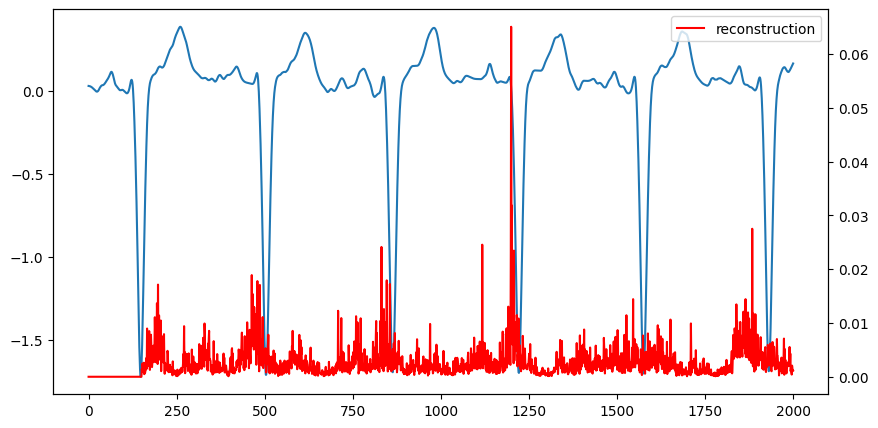

In [27]:

SAMPLE_IDX = 188
CHANNEL = 2
ds = PtbxlSigWithRpeaksDS(root_folder="../data")

sig, rpeaks = ds[SAMPLE_IDX]

latent_representation = m.encoder(sig.unsqueeze(0).to('cuda'))
# reconstruction = m.generate(latent_representation, smoothing_iterations=10).squeeze().detach().cpu()
reconstruction = torch.mean(
    torch.stack([m.decoder(latent_representation) for idx in range(0, 100)]), dim=0
).squeeze().detach().cpu()
orig_plot = sig[CHANNEL]
recon_plot = reconstruction

orig_plot.shape
plt.rcParams['figure.figsize'] = [10, 5]
fig, ax = plt.subplots()

ax_rpeaks = ax.twinx()

# ax.set_title(f"Reconstruction Loss {mse_loss(orig_plot, recon_plot):.5f}")
ax.plot(range(0, 2000), orig_plot[0:2000], label='original')
ax_rpeaks.plot(range(0, 2000), recon_plot[0:2000], label='reconstruction', color='red')
plt.legend(loc='best')